In [80]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
# Read the data
data = pd.read_csv('TSLA.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2302,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400
2303,2024-02-28,200.419998,205.300003,198.440002,202.039993,202.039993,99806200
2304,2024-02-29,204.179993,205.279999,198.449997,201.880005,201.880005,85907000
2305,2024-03-01,200.520004,204.520004,198.500000,202.639999,202.639999,82099200
2306,2024-03-04,198.729996,199.750000,186.720001,188.139999,188.139999,133131110


In [63]:
# Drop unnecessary columns
data.drop("Adj Close", axis = 1,inplace = True)

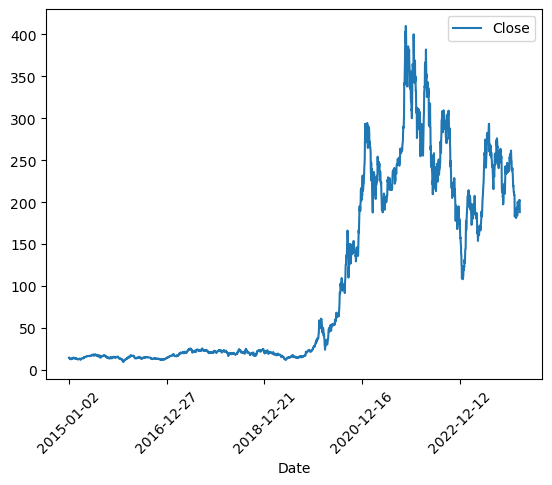

In [64]:
# Visualize the data
data.plot(x="Date", y="Close")
plt.xticks(size=10,rotation=45)
plt.show()

In [65]:
# Data exploration
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [66]:
# Convert column to its proper data type
data['Date']= pd.to_datetime(data['Date'])

In [67]:
#Explore data
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

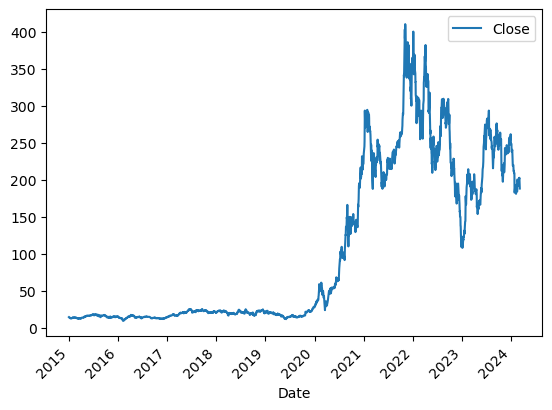

In [68]:
# Visualize data
data.plot(x="Date", y="Close")
plt.xticks(size=10,rotation=45)
plt.show()

In [71]:
# Data exploration
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [72]:
# Data exploration
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [73]:
#Get data's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2307 non-null   datetime64[ns]
 1   Open    2307 non-null   float64       
 2   High    2307 non-null   float64       
 3   Low     2307 non-null   float64       
 4   Close   2307 non-null   float64       
 5   Volume  2307 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 108.3 KB


In [77]:
# Split data
X = data[['Open','High','Low','Volume']]
y = data['Close']

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state = 0)

In [82]:
# Fit data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [83]:
# Predict data
predicted = regressor.predict(X_test)

In [84]:
# Show prediction
print(X_test)

            Open        High         Low     Volume
124    18.073999   18.174667   17.856667   31518000
2306  198.729996  199.750000  186.720001  133131110
1428  135.743332  143.933334  134.000000  262788300
1964  208.279999  215.550003  202.000000  117798100
1727  336.803345  359.366669  329.103333  128408100
...          ...         ...         ...        ...
1129   14.732667   15.011333   14.720000  102771000
310    15.326000   15.492000   15.022000   60214500
187    16.799999   16.826668   16.156000   73944000
776    23.400000   23.977333   23.242001   62965500
811    20.750000   20.750000   20.030001   99823500

[577 rows x 4 columns]


In [87]:
# Create a dataframe 
dataframe = pd.DataFrame({'Actual Price':y_test,'Predicted Price': predicted})
dataframe.head(10)

,Actual Price,Predicted Price
124,17.943333,18.013142
2306,188.139999,189.945529
1428,135.666672,141.436202
1964,207.279999,209.516420
1727,355.983337,350.201687
921,20.334000,20.442055
486,12.390000,12.305996
2069,192.220001,193.421515
1585,248.039993,244.668361
1081,17.516666,17.636755


In [88]:
# Calculate score percentage
regressor.score(X_test,y_test)

0.9996383019611945

<Axes: >

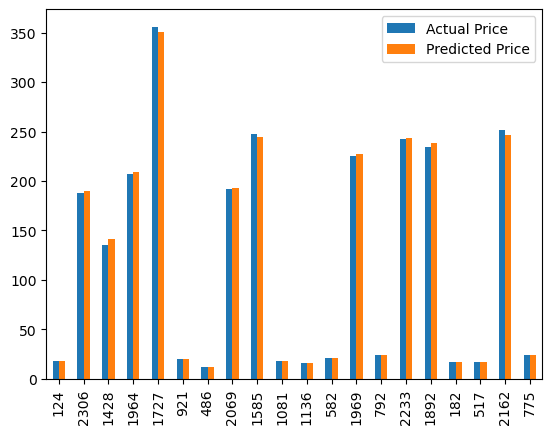

In [105]:
graph = dataframe.head(20)
graph.plot(kind='bar')